In [50]:
import celeba_utils
import anchor_image
import image_utils
from torchvision import transforms
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import class_models
import torch

In [37]:
def f(x):
    x = x.unsqueeze(0)
    return nn.functional.interpolate(x, size=(256,256)).squeeze()

In [45]:
data_dir = './celebA-HQ'
img_dir = 'imgs/'
labels_dir = 'Anno/'

transform = transforms.Compose([lambda x: x.resize((256,256)),
                                lambda x: np.array(x) / 255.])

celebahq_test = celeba_utils.CelebA(data_dir,img_dir+'test',labels_dir+'test.txt',
                            transform=transform, mask=False)

(6000, 40)


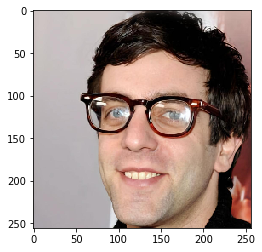

In [47]:
plt.imshow(celebahq_test[0][0])

In [69]:
classifier = class_models.celebAModel((3,256,256))
classifier.load_state_dict(torch.load('pretrained_celeba_smiling_4.pt'))
classifier.eval();

In [72]:
def predict_fn(images):
    try:
        images = torch.from_numpy(np.moveaxis(images,-1,1)).type(torch.FloatTensor)
    except:
        pass
    return classifier(images.view(images.shape[0],3,256,256)).data.numpy()

In [74]:
explainer = anchor_image.AnchorImageCeleb([], 'yeet', dummys = celebahq_test)

In [76]:
test_img = celebahq_test[0][0]

In [77]:
res = explainer.explain_instance(test_img, predict_fn, verbose=True)

True pred 1
Taking coverage data...
Checkpoint 1
Making tuples...
Best: 8 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 16 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 0 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 1 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 9 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 2 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 15 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 3 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 11 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 13 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 6 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 5 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 4 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 7 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 14 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 10 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 8 (mean:0.8415841584, n: 101, lb:0.5789) Worst: 12 (mean:0.0000, n: 1, ub:1.0000) B = 0.42
Best: 8 (mean:0.8308457711, n: 201, lb:0.6499) Worst: 0 (mean:0.6535, n: 101, u

In [79]:
c, segments, exp = res

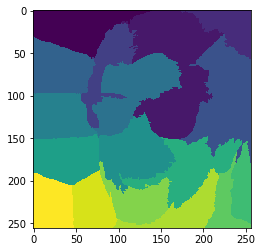

In [80]:
plt.imshow(segments)

In [82]:
exp_ = {}
exp_['feature'] = [x[0] for x in exp]
_,mask = image_utils.create_mask(test_img,segments,exp_)
mask_exp = np.tile(np.expand_dims(mask, -1), (1, 1, 3))

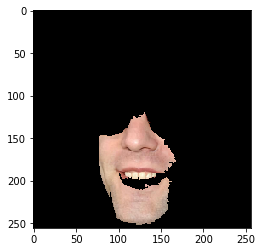

In [85]:
plt.imshow(mask_exp * test_img)